# CIFAR-10 CNN

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


## Data Preperation

1. Loads the CIFAR-10 dataset: Splits the data into training and testing sets.
2. Normalizes pixel values: Scales the pixel values to a range between 0 and 1.
3. Applies one-hot encoding: Converts the class labels into a one-hot encoded format. 

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


## CNN Model

1.  Convolutional Layers: Three convolutional layers (`Conv2D`) with ReLU activation.
2. Max Pooling Layers: Max pooling layers to reduce the spatial dimensions.
3. Dropout Layers: Dropout layers to prevent overfitting.
4. Flatten Layers: Flattens the 3D feature maps into 1D vector.
5. Dense Layer: A dense layer with softmax activation.


In [3]:
model = keras.Sequential([

    # First Layer
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    # Second Layer
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Third Layer
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Model Training

This cell trains the CNN model using the training data and validates it on a portion of the data (25%)

1. Early Stopping: Implements early stopping to prevent overfitting.
2. Training Params: Sets batch size and epoch count for training.
3. Model Compilation: Compiles model with the categorical crossentropy loss function, Adam optimizer, and accuracy metric.
4. Model fitting: Trains the model using fit method and passing the training data, validation split, and early stopping callback.

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)


batch_size = 128
epochs = 32

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.25, callbacks=[early_stopping])


Epoch 1/32
  1/293 [..............................] - ETA: 47s - loss: 2.3180 - accuracy: 0.1484

2025-03-26 16:30:27.635994: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


293/293 [==============================] - 9s 29ms/step - loss: 1.7405 - accuracy: 0.3620 - val_loss: 1.4308 - val_accuracy: 0.4890
Epoch 2/32
293/293 [==============================] - 8s 28ms/step - loss: 1.3934 - accuracy: 0.4977 - val_loss: 1.2943 - val_accuracy: 0.5473
Epoch 3/32
293/293 [==============================] - 9s 30ms/step - loss: 1.2591 - accuracy: 0.5511 - val_loss: 1.1471 - val_accuracy: 0.6029
Epoch 4/32
293/293 [==============================] - 8s 27ms/step - loss: 1.1558 - accuracy: 0.5902 - val_loss: 1.0779 - val_accuracy: 0.6246
Epoch 5/32
293/293 [==============================] - 8s 27ms/step - loss: 1.0802 - accuracy: 0.6195 - val_loss: 1.0073 - val_accuracy: 0.6503
Epoch 6/32
293/293 [==============================] - 9s 30ms/step - loss: 1.0131 - accuracy: 0.6432 - val_loss: 0.9412 - val_accuracy: 0.6780
Epoch 7/32
293/293 [==============================] - 9s 30ms/step - loss: 0.9709 - accuracy: 0.6612 - val_loss: 0.9357 - val_accuracy: 0.6801
Epoch 8/32

This cell visualizes the training and validation loss curve.

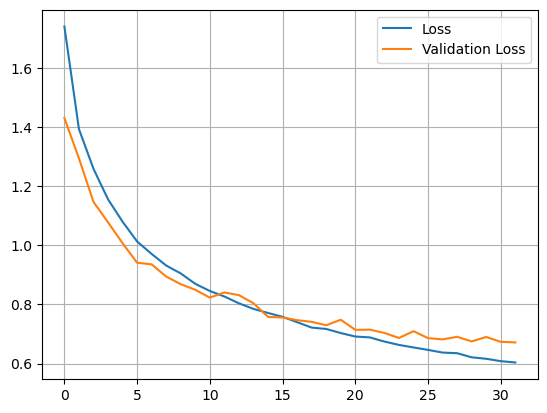

In [5]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()


## Model Evaluation

This cell evaluates the trained model on the test dataset to assess its performance on unseen data.

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.6767110824584961
Test accuracy: 0.7660999894142151


## Visualizing Predictions

Here we visualize models predictions on a random sample of test images.

313/313 [==============================] - 1s 3ms/step


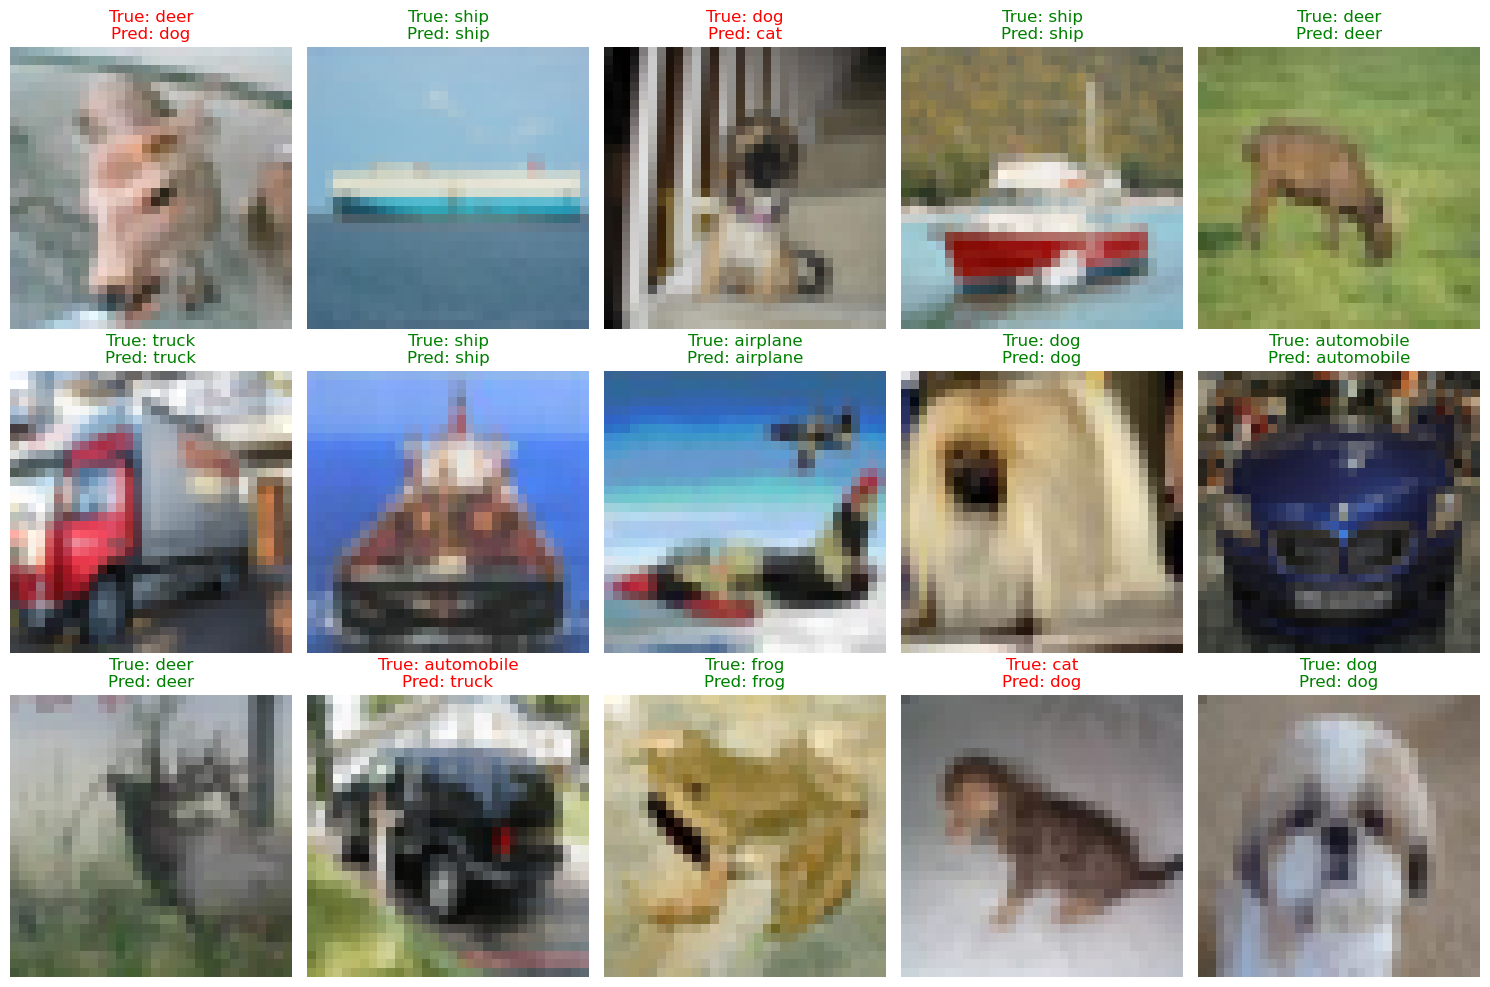

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

num_samples = 15
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices):
    img = x_test[idx]

    true_label = np.argmax(y_test[idx])
    pred_label = predicted_classes[idx]

    color = 'green' if true_label == pred_label else 'red'

    plt.subplot(3, 5, i+1)
    plt.imshow(img)
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}",
              color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()